In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


In [8]:
def dSdt(t, y):
    # Assign state variables
    C8 = y[0]
    C8star = y[1]
    C3 = y[2]
    C3star = y[3]
    BAR = y[4]
    IAP = y[5]
    C8starBAR = y[6]
    C3starIAP = y[7]

    input = 0
    if t > 100 and t < 100+1100:
        input = 200
    
    # Calculate derivatives
    dy_dt = np.array([k1 - k2*C8 - k3*(C3star+input)*C8,
                      k3*(C3star+input)*C8 - k4*C8star - k5*C8star*BAR + k6*C8starBAR,
                      k7 - k8*C3 - k9*C8star*C3,
                      k9*C8star*C3 - k10*C3star - k11*C3star*IAP + k12*C3starIAP,
                      k13 - k5*C8star*BAR + k6*C8starBAR - k14*BAR,
                      k15 - k11*C3star*IAP+k12*C3starIAP - (k16+k17*C3star)*IAP,
                      k5*C8star*BAR - k6*C8starBAR - k18*C8starBAR,
                      k11*C3star*IAP - k12*C3starIAP - k19*C3starIAP])
    return dy_dt


In [6]:
# Assign initial condition (taken from a previous simulation run with input = 0)
S0 = 1e5 * np.array([1.30, 0, 0.21, 0, 0.4, 0.4, 0, 0])

# Assign parameter values
k1 = 507
k2 = 3.9e-3
k3 = 1e-5
k4 = 5.8e-3
k5 = 5e-4
k6 = 0.21
k7 = 81.9
k8 = 3.9e-3
k9 = 5.8e-6
k10 = 5.8e-3
k11 = 5e-4
k12 = 0.21
k13 = 40
k14 = 1e-3
k15 = 464
k16 = 1.16e-2
k17 = 3e-4
k18 = 1.16e-2
k19 = 1.73e-2

n_steps = 1800


In [4]:
t0 = 0
tf = 1800


In [9]:
t_eval = np.linspace(t0, tf, n_steps+1)
solution = solve_ivp(dSdt, t_span=(t0, tf), y0=S0, t_eval=t_eval)

In [10]:
t = solution.t
S = solution.y


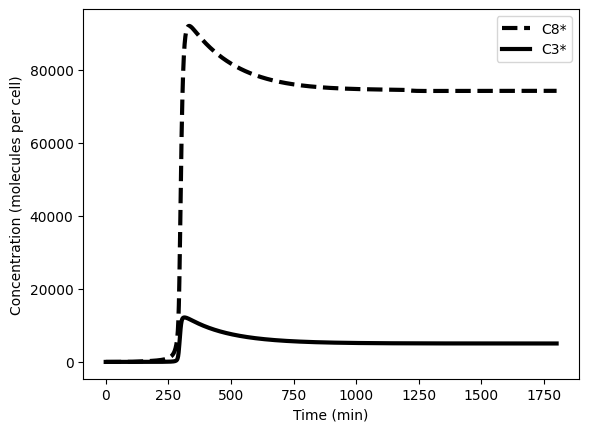

In [11]:
plt.plot(t, S[1,:], 'k--', t, S[3,:], 'k', linewidth=3)
plt.legend(['C8*', 'C3*'])
plt.xlabel('Time (min)')
plt.ylabel('Concentration (molecules per cell)')
plt.show()
